In [1]:
import sys
import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import logging
logging.basicConfig(
    level=logging.INFO,  # Set the minimum logging level to INFO
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

In [2]:
sys.path.append('../')
from PMpostprocess import PMpostprocess as pp
from PMpostprocess import signal_processing as sp

profilemonitor_plot_util start


In [3]:
sys.path.append('../../')
from FRIB_model import ISAAC_helper as ih
from FRIB_model import flame_helper as fh

FRIB_model version: 1.0.0. updated on 2024-03-05


In [4]:
import warnings
from contextlib import contextmanager

@contextmanager
def capture_warnings():
    """
    A context manager to capture and print warnings within a block of code.
    """
    with warnings.catch_warnings(record=True) as caught_warnings:
        warnings.simplefilter("always")  # Always capture warnings
        yield  # Allow code execution within the context
        for w in caught_warnings:
            print(f"Warning message: {w.message}")
            print(f"Warning type: {w.category.__name__}")
            print(f"Originated from: {w.filename}, line {w.lineno}")

In [5]:
ISAAC_database_path = "/home/devuser/sf_HWANG/Workspace/BPM4pickup/ISAAC_data_PMver0"

In [6]:
CS_new_df = {}
CS_orig_df = {}
fm_goals_orig_df = {}
fm_goals_df = {}
fm_errs_df = {}
fm_evals_result_df = {}
reprocessed_profile_df = {}
raw_data_flist_df = {}

for item in glob.glob(os.path.join(ISAAC_database_path, '*')):
    name = os.path.basename(item)
    if "FS1_CSS_PM_D2225_pv_scan" in name:
        if '20231201_134042' in name:
            continue
        if 'no_use' in name:
            continue
        if name in CS_new_df.keys():
            continue
#         try:
        with capture_warnings():
            htmlstr = "<h3>" + name + "</h3>"
            display(HTML(htmlstr))
            isac_data = ih.get_most_recent_reconst_data(name, ISAAC_database_path)
            if isac_data is None:
                continue
            raw = pp.read_all_raw_data(ih, name, ISAAC_database_path)
            CS_new, CS_orig, fm, fm_evals, fm_goals, fm_goals_processed, fm_evals_result, reprocessed_profile, raw_data_flist = pp.reprocess_CS(fh, isac_data, raw)
            CS_new_df[name] = CS_new
            CS_orig_df[name] = CS_orig
            fm_goals_orig_df[name] = fm_goals['df']
            fm_goals_df[name] = fm_goals_processed['df']
            fm_errs_df[name] = fm_goals_processed['err']
            fm_evals_result_df[name] = fm_evals_result
            reprocessed_profile_df[name] = reprocessed_profile
            raw_data_flist_df[name] = raw_data_flist
#         except Exception as e:
#             display(HTML(f'<div style="color:red; font-weight:bold; font-size:16px;">An error occurred while processing {name}: {e}</div>'))
#             #print(f"An error occurred while processing {name}: {e}")
            
CS_new_df = pd.DataFrame(CS_new_df).T
CS_orig_df = pd.DataFrame(CS_orig_df).T

0-th trial, current_loss: 0.00122, best_loss: 0.00122
2-th trial, current_loss: 0.0012, best_loss: 0.0012


0-th trial, current_loss: 0.00223, best_loss: 0.00223
2-th trial, current_loss: 0.0022, best_loss: 0.0022


0-th trial, current_loss: 0.00324, best_loss: 0.00324
2-th trial, current_loss: 0.00311, best_loss: 0.00311


0-th trial, current_loss: 0.00574, best_loss: 0.00574
2-th trial, current_loss: 0.00557, best_loss: 0.00557


0-th trial, current_loss: 0.0032, best_loss: 0.0032
2-th trial, current_loss: 0.0032, best_loss: 0.0032


0-th trial, current_loss: 0.00289, best_loss: 0.00289
2-th trial, current_loss: 0.00288, best_loss: 0.00288


0-th trial, current_loss: 0.00217, best_loss: 0.00217
2-th trial, current_loss: 0.00212, best_loss: 0.00212


0-th trial, current_loss: 0.00167, best_loss: 0.00167
2-th trial, current_loss: 0.00162, best_loss: 0.00162


0-th trial, current_loss: 0.00339, best_loss: 0.00339
2-th trial, current_loss: 0.00339, best_loss: 0.00339
Warning message: invalid value encountered in sqrt
Warning type: RuntimeWarning
Originated from: /media/sf_HWANG/My Drive/GitHub/PMpostprocess/example/../PMpostprocess/signal_processing.py, line 201


0-th trial, current_loss: 0.000768, best_loss: 0.000768
2-th trial, current_loss: 0.000756, best_loss: 0.000756


0-th trial, current_loss: 0.000235, best_loss: 0.000235
2-th trial, current_loss: 0.000235, best_loss: 0.000235


0-th trial, current_loss: 0.00175, best_loss: 0.00175
2-th trial, current_loss: 0.00175, best_loss: 0.00175


0-th trial, current_loss: 0.00232, best_loss: 0.00232
2-th trial, current_loss: 0.00215, best_loss: 0.00215


0-th trial, current_loss: 0.00278, best_loss: 0.00278
2-th trial, current_loss: 0.00278, best_loss: 0.00278


0-th trial, current_loss: 0.0588, best_loss: 0.0588
2-th trial, current_loss: 0.0588, best_loss: 0.0588


0-th trial, current_loss: 0.00818, best_loss: 0.00818
2-th trial, current_loss: 0.00817, best_loss: 0.00817


0-th trial, current_loss: 0.00447, best_loss: 0.00447
2-th trial, current_loss: 0.00447, best_loss: 0.00447


0-th trial, current_loss: 0.000935, best_loss: 0.000935
2-th trial, current_loss: 0.000934, best_loss: 0.000934


0-th trial, current_loss: 0.0204, best_loss: 0.0204
2-th trial, current_loss: 0.0196, best_loss: 0.0196


0-th trial, current_loss: 0.011, best_loss: 0.011
2-th trial, current_loss: 0.011, best_loss: 0.011


0-th trial, current_loss: 0.00901, best_loss: 0.00901
2-th trial, current_loss: 0.009, best_loss: 0.009


0-th trial, current_loss: 0.00615, best_loss: 0.00615
2-th trial, current_loss: 0.00615, best_loss: 0.00615


In [7]:
def sort_by_date(df):
    df = df.copy().reset_index()  # Reset index for manipulation
    df['date'] = df['index'].str[:8]  # Extract the date from the index
    df = df.sort_values(by='date')  # Sort by the extracted date
    return df.drop(columns=['date'])  # Drop the temporary 'date' column

df_new = sort_by_date(CS_new_df)
df_new['label'] = df_new['index'].str.replace(r'_(\d{2})(\d{4})_', r'_\1_', regex=True)  # Keeps HH and removes MMSS
df_new['label'] = df_new['label'].str.replace('_FS1_CSS_PM_D2225_pv_scan.*', '', regex=True)

df_orig = sort_by_date(CS_orig_df)
df_orig['label'] = df_orig['index'].str.replace(r'_(\d{2})(\d{4})_', r'_\1_', regex=True)  # Keeps HH and removes MMSS
df_orig['label'] = df_orig['label'].str.replace('_FS1_CSS_PM_D2225_pv_scan.*', '', regex=True)


In [8]:
def plot_comparison(column_name):
    """
    Plots a comparison of two DataFrames based on a specified column.

    Parameters:
    - df_new: The new DataFrame (PostProcess data).
    - df_orig: The original DataFrame (ISAAC data).
    - column_name: The column name (as a string) to compare in the DataFrames.
    """
    plt.figure(figsize=(12, 5))
    plt.scatter(df_new['label'], df_new[column_name], color='red', label='PostProcess', alpha=0.7)
    plt.scatter(df_orig['label'], df_orig[column_name], color='blue', label='ISAAC', alpha=0.7)

    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend()

    # Show the plot
    plt.show()

In [9]:
def is_none_or_nan(value):
    return value is None or np.isnan(value)

# Examples
print(is_none_or_nan(None))  # True

True


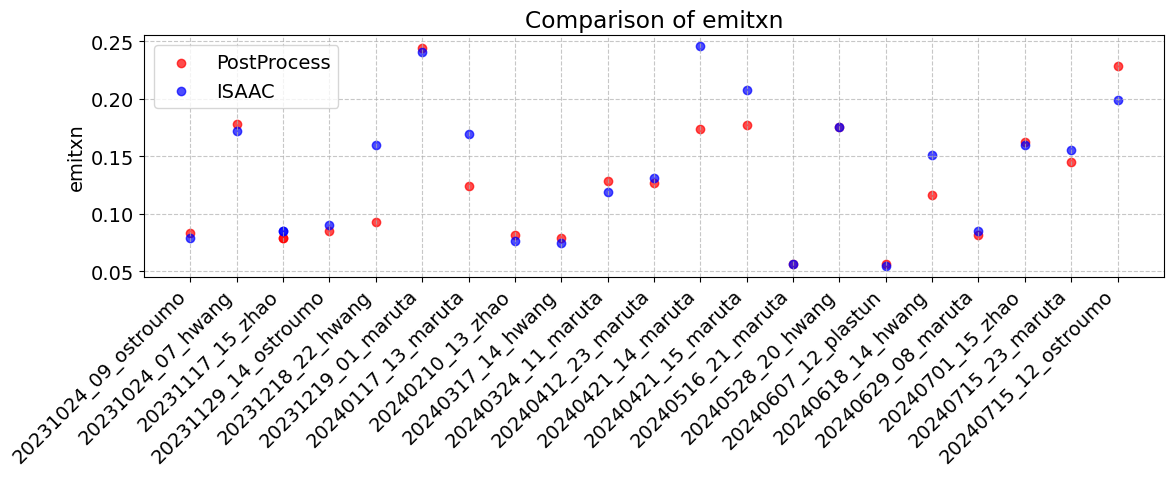

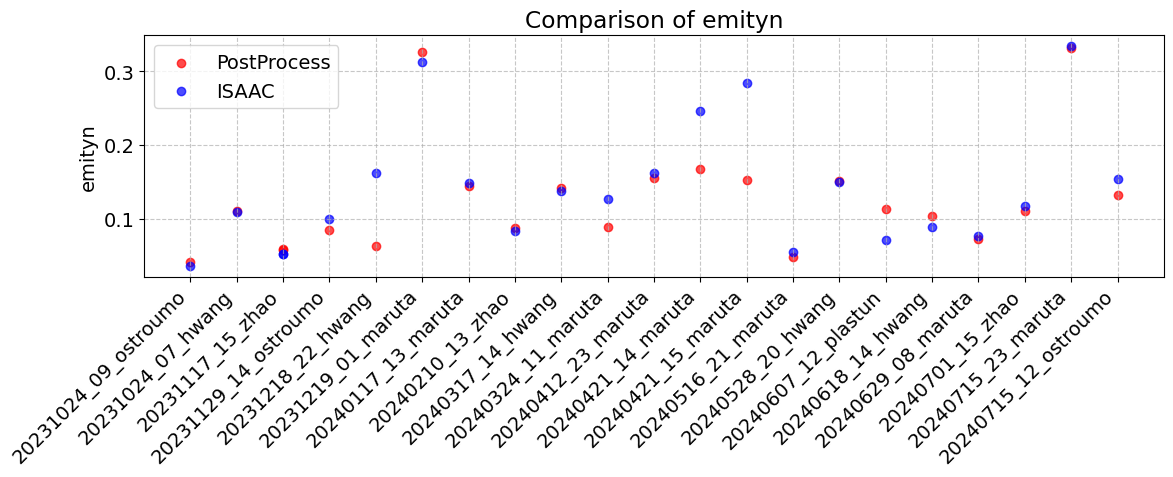

In [10]:
plot_comparison('emitxn')
plot_comparison('emityn')

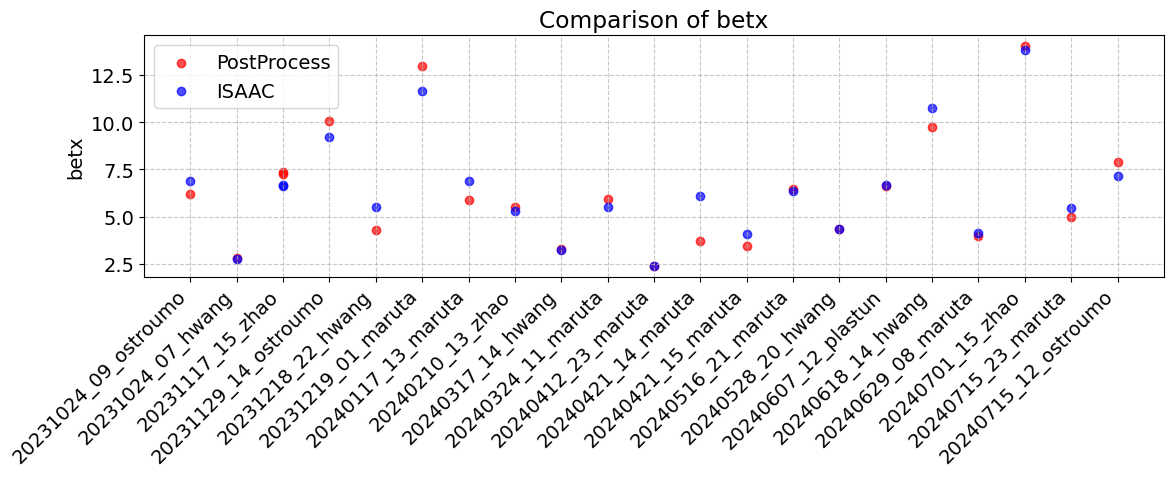

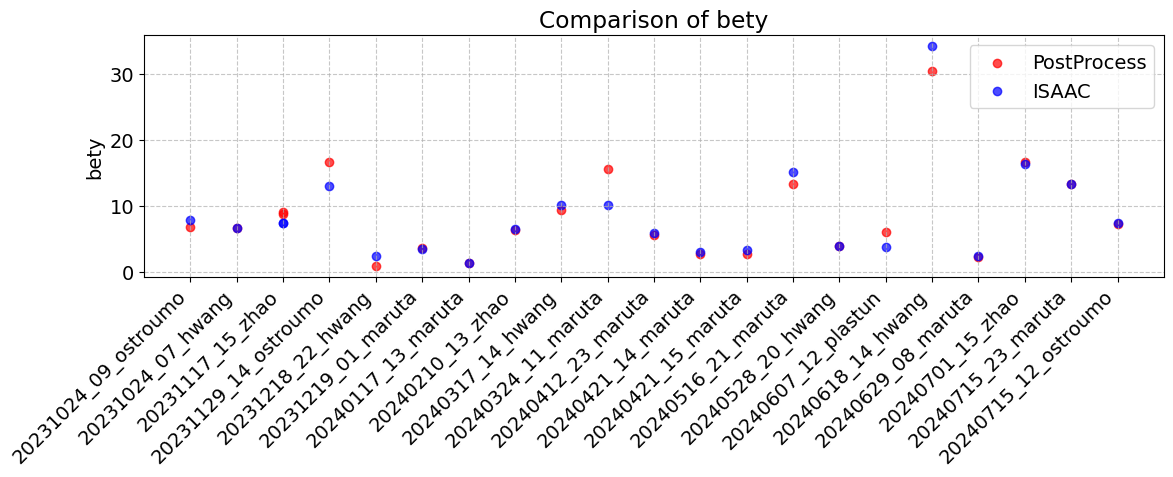

In [11]:
plot_comparison('betx')
plot_comparison('bety')

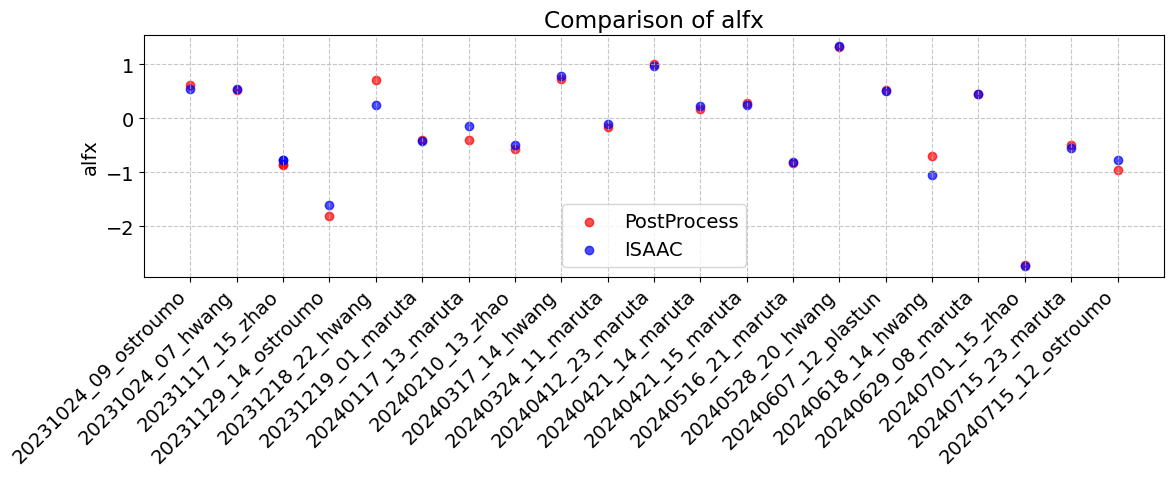

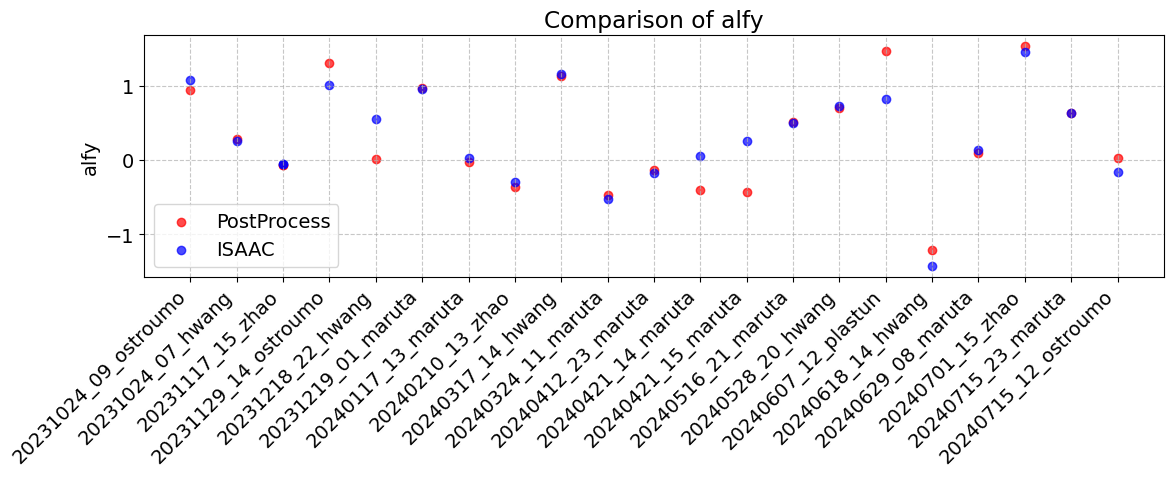

In [12]:
plot_comparison('alfx')
plot_comparison('alfy')

In [13]:
from datetime import datetime
exam_dates = ("20231201","20231218_22", "20231219_01", "20240117_13", "20240421_14", "20240421_15")
idx4exam = [idx for idx in CS_new_df.index if any(date in idx for date in exam_dates)]
idx4exam = sorted(
    idx4exam,
    key=lambda x: datetime.strptime(
        x.split('_')[0], "%Y%m%d%H%M%S" if len(x.split('_')[0]) > 8 else "%Y%m%d"
    )
)
idx4exam

['20231218_220322_hwang_FS1_CSS_PM_D2225_pv_scan',
 '20231219_010647_maruta_FS1_CSS_PM_D2225_pv_scan',
 '20240117_135242_maruta_FS1_CSS_PM_D2225_pv_scan',
 '20240421_140218_maruta_FS1_CSS_PM_D2225_pv_scan_1st',
 '20240421_151651_maruta_FS1_CSS_PM_D2225_pv_scan']

[False False False False False]


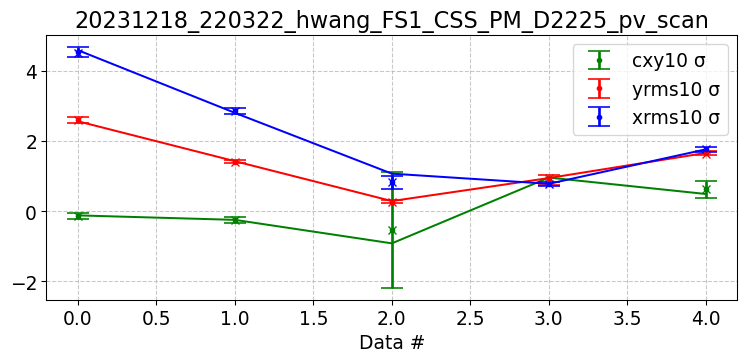

[False False False False  True False]


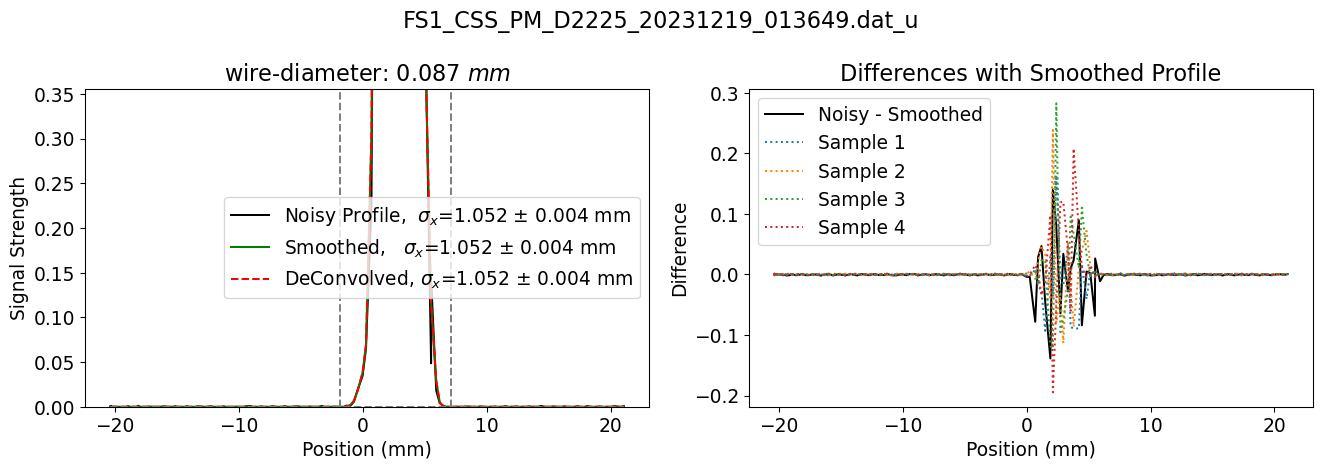

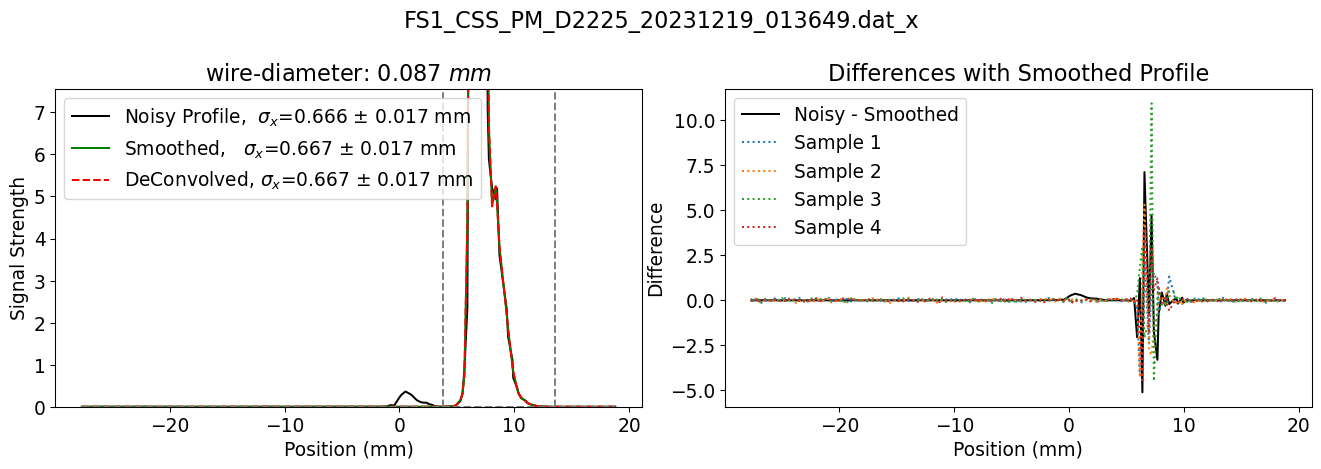

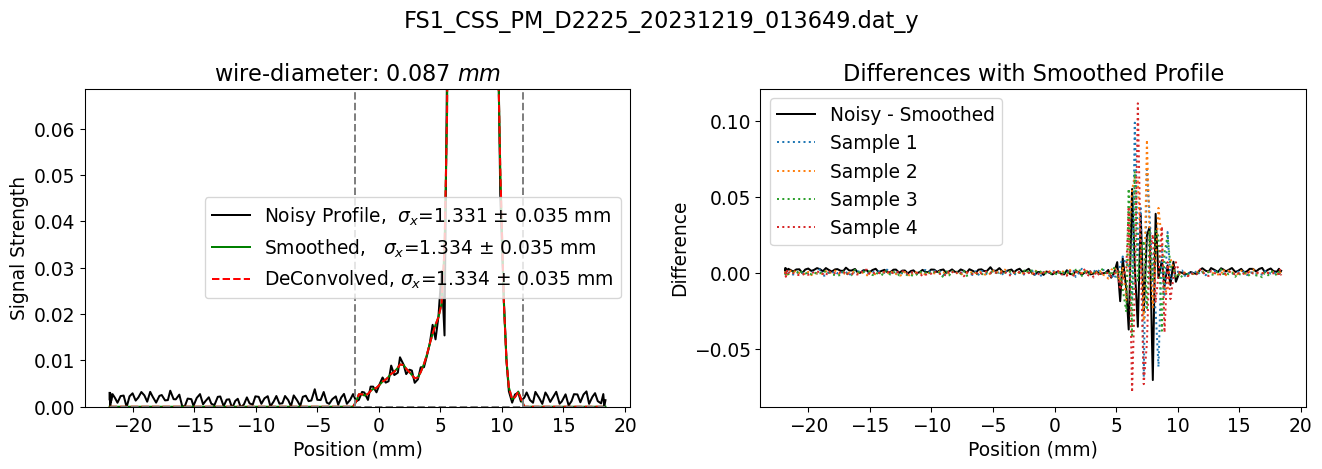

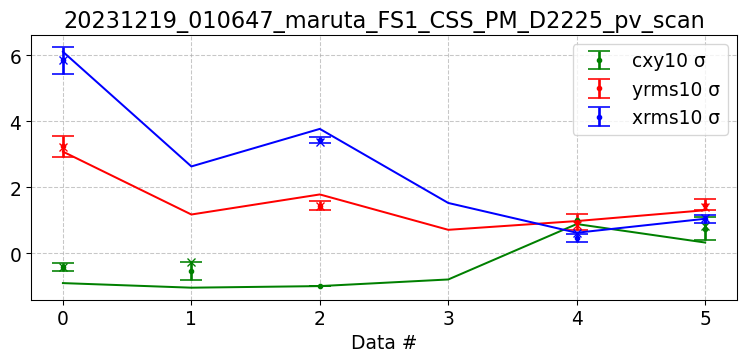

[False False False False False False]


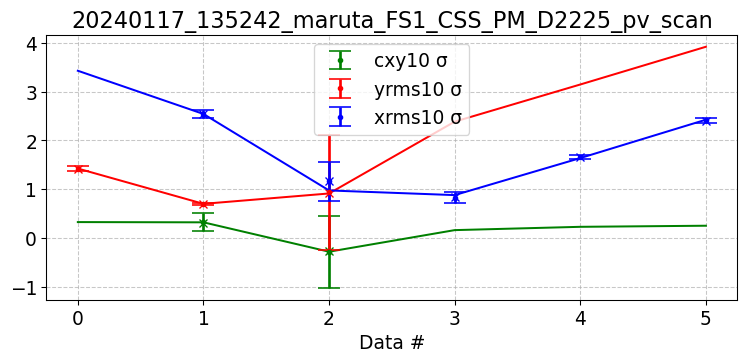

[False False False False False False False False False False False]


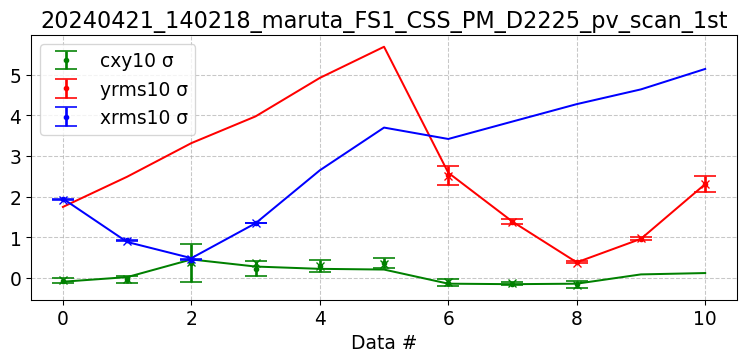

[False False False False False False False  True False False]


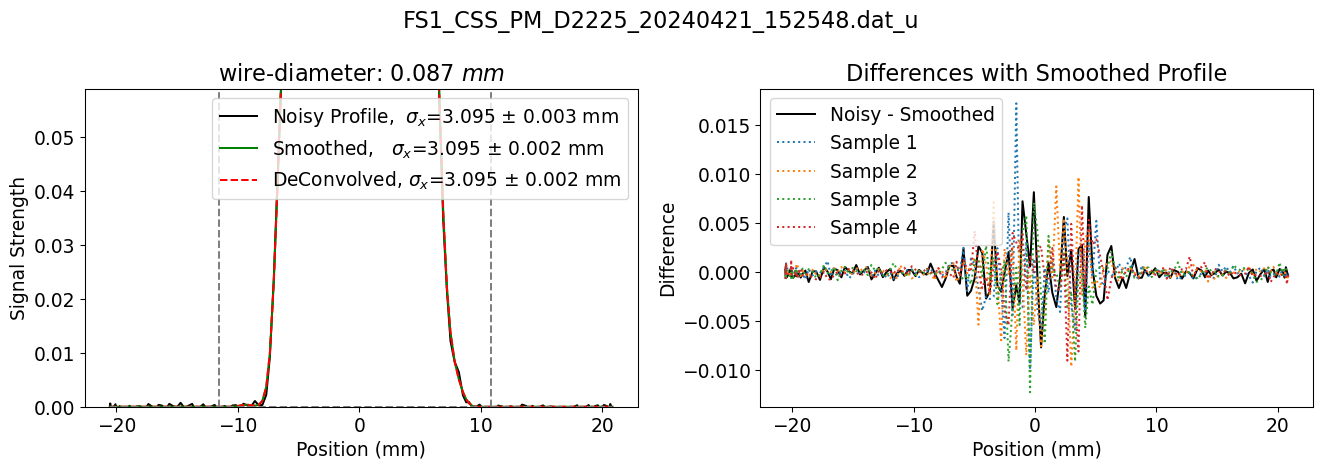

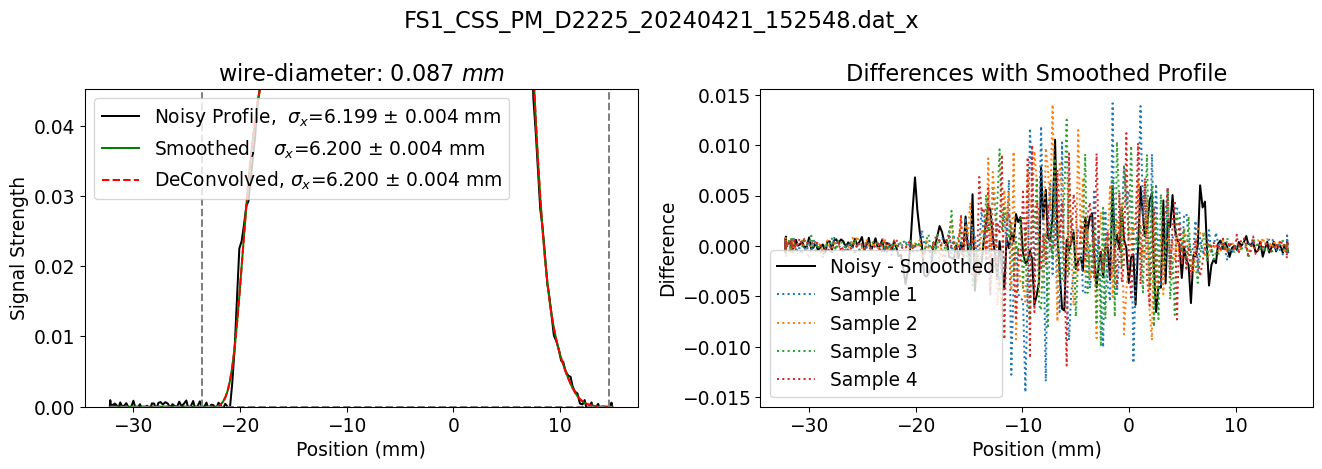

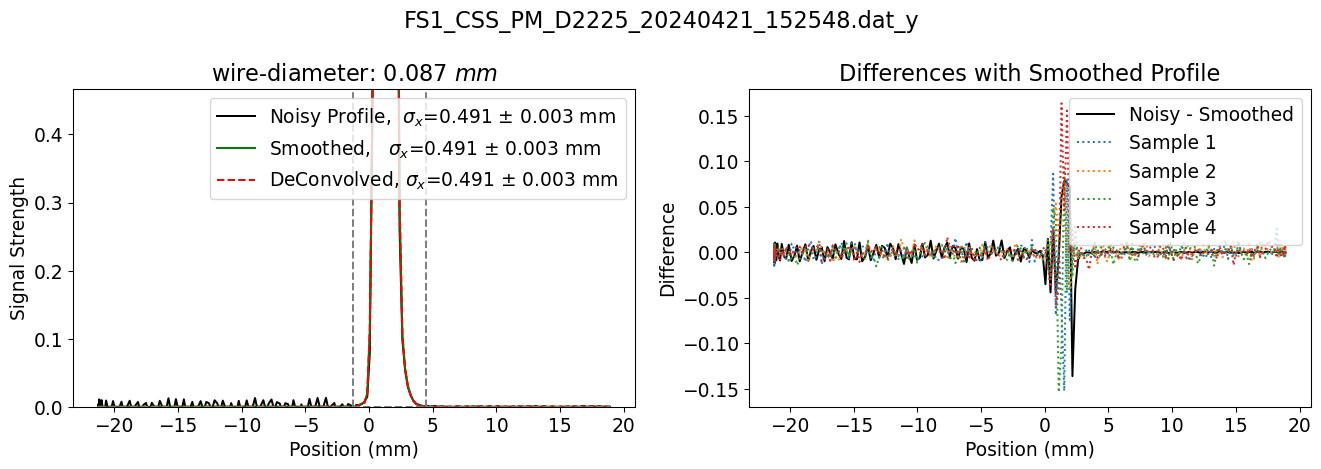

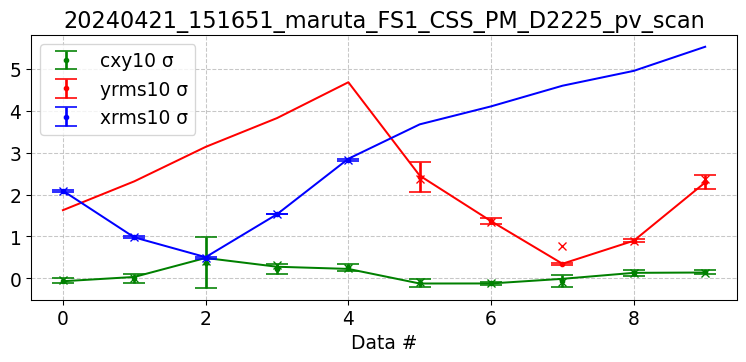

In [14]:
for idx in idx4exam:  # Use the desired index for plotting
#     display(fm_goals_orig_df[idx])
#     display(fm_goals_df[idx])
    ratio_1 = fm_goals_df[idx] / fm_goals_orig_df[idx]
    mask_1 = (ratio_1.values[:, 0] > 1.2) | (ratio_1.values[:, 0] < 0.8) | \
             (ratio_1.values[:, 1] > 1.2) | (ratio_1.values[:, 1] < 0.8)
    ratio_2 = fm_goals_df[idx] / fm_evals_result_df[idx]
    mask_2 = (ratio_2.values[:, 0] > 1.1) | (ratio_2.values[:, 0] < 0.9) | \
             (ratio_2.values[:, 1] > 1.1) | (ratio_2.values[:, 1] < 0.9)
    combined_mask = mask_1 #| mask_2  # Element-wise OR to combine the two conditions
    print(combined_mask)

    profiles = [(k, reprocessed_profile_df[idx][k]) for k in raw_data_flist_df[idx]]
    profiles = [(k, v) for i, (k, v) in enumerate(profiles) if combined_mask[i]]
            
    for k, val in profiles:
        coord = val['coord']
        wire_diam = val['wire_diam']
        for ic,v in enumerate(val['postprocess']['denoised']):
            sp.plot_profile(
                x=v['x'], 
                y=v['y'], 
                smoothed=v['smoothed'], 
                wire_deconvolved=v['wire_deconvolved'], 
                rms_noisy=v['rms_noisy'], 
                rms_smooth=v['rms_smooth'], 
                rms_deconv=v['rms_deconv'], 
                MC_stat=v['MC_stat'],
                xstart = v['xstart'],
                xend=v['xend'],
                offset=v['offset'],
                wire_diam = wire_diam,
                title=k+'_'+coord[1+ic],
                ylim_factor = 0.1,
            )
    

    plt.figure(figsize=(8, 4), dpi=96)

    # Colors for the respective labels
    colors = ['blue', 'red', 'green']

    # Reverse the order for plotting
    for i, (k, color) in reversed(list(enumerate(zip(['xrms', 'yrms', 'cxy'], colors)))):
        plt.errorbar(
            fm_goals_df[idx].index,                          # X-axis data
            fm_goals_df[idx].values[:, i],                  # Y-axis data (mean values)
            yerr=fm_errs_df[idx].values[:, i]*10,          # Error bars (10σ)
            fmt='o',                                        # Only show points, no line
            label=k+'10 σ',                                 # Label for the error bars
            color=color,                                    # Assign specific color
            capsize=8,                                      # Increase cap size for error bars
            elinewidth=2,                                   # Thicker error bar lines
            markersize=3,                                   # Larger marker size
            markeredgewidth=1.2,                            # Thicker marker edge
        )
        plt.plot(fm_evals_result_df[idx].values[:, i],color=color)
        plt.plot(fm_goals_orig_df[idx].values[:, i], color=color, marker='x', linestyle='')     
    

    # Customize the plot
    plt.xlabel('Data #')
    plt.title(idx)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    # Display the plot
    plt.show()

In [15]:
idx4exam

['20231218_220322_hwang_FS1_CSS_PM_D2225_pv_scan',
 '20231219_010647_maruta_FS1_CSS_PM_D2225_pv_scan',
 '20240117_135242_maruta_FS1_CSS_PM_D2225_pv_scan',
 '20240421_140218_maruta_FS1_CSS_PM_D2225_pv_scan_1st',
 '20240421_151651_maruta_FS1_CSS_PM_D2225_pv_scan']

In [16]:
def plot_profile(x,y,smoothed,wire_deconvolved,rms_noisy,rms_smooth,rms_deconv,MC_stat,xstart,xend,offset,wire_diam=None,title=None, ylim_factor=1.4):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=96)  # Create a figure with two subplots in a row
    axes[0].plot(x, y, color="black", label=f"Noisy Profile,  $\\sigma_x$={rms_noisy:.3f} $\\pm$ {MC_stat['noisy_std']:.3f} mm")
    axes[0].plot(x, smoothed, color="green", label=f"Smoothed,   $\\sigma_x$={rms_smooth:.3f} $\\pm$ {MC_stat['smooth_std']:.3f} mm")
    axes[0].plot(x, wire_deconvolved, '--', color="red", label=f"DeConvolved, $\\sigma_x$={rms_deconv:.3f} $\\pm$ {MC_stat['deconv_std']:.3f} mm")
    axes[0].legend()
    axes[0].vlines([xstart, xend], 0, 1.4*max(y), color="gray", linestyle="--")
    axes[0].hlines([offset], x[0], x[-1], color="gray", linestyle="--")
    axes[0].set_xlabel("Position (mm)")
    axes[0].set_ylabel("Signal Strength")
    axes[0].set_ylim(0, ylim_factor * max(y))
    if wire_diam:
        axes[0].set_title(f"wire-diameter: {wire_diam:.3f} $mm$")

    axes[1].plot(x, y - smoothed, 'k', label="Noisy - Smoothed")
    for i in range(4):
        y_ = MC_stat['arr_y_samples'][i]
        axes[1].plot(x, y_ - smoothed, ':', label=f"Sample {i+1}")
    axes[1].set_xlabel("Position (mm)")
    axes[1].set_ylabel("Difference")
    axes[1].legend()
    axes[1].set_title("Differences with Smoothed Profile")
    # Adjust layout for better spacing
    if title is not None:
        fig.suptitle(title)
    plt.tight_layout()
    plt.show()